In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

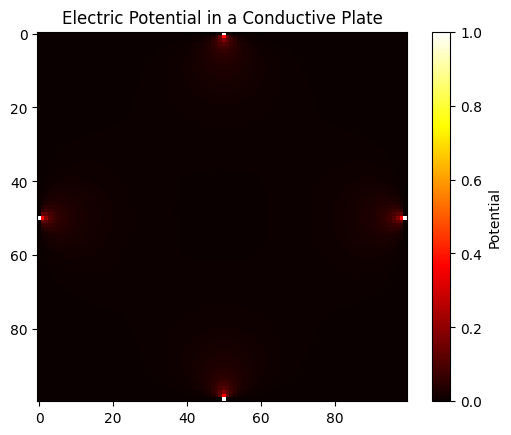

In [4]:

# Define the size of the plate
width, height = 100, 100

# Initialize the plate with zeros
plate = np.zeros((height, width))

# Set the potential at the contacts
plate[0, 50] = 1  # Top contact
plate[-1, -50] = 1  # Bottom contact
plate[50, 0] = 1  # Left contact
plate[-50, -1] = 1  # Right contact

# Accuracy for the method
accuracy = 1e-5

# Laplace's equation solver
def laplace_solver(plate, accuracy):
    delta = 1.0
    while delta > accuracy:
        old_plate = plate.copy()
        # Update the potential of each point
        plate[1:-1, 1:-1] = (old_plate[:-2, 1:-1] + old_plate[2:, 1:-1] + old_plate[1:-1, :-2] + old_plate[1:-1, 2:]) / 4
        delta = np.max(np.abs(plate - old_plate))
    return plate

# Solve Laplace's equation
plate = laplace_solver(plate, accuracy)

# Plot the potential
plt.imshow(plate, cmap='hot')
plt.colorbar(label='Potential')
plt.title('Electric Potential in a Conductive Plate')
plt.show()

ValueError: Diagonal length (index 1: 101 at offset 0) does not agree with matrix size (102, 102).

/Users/vlad/PycharmProjects/resistence_reserch/venv/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


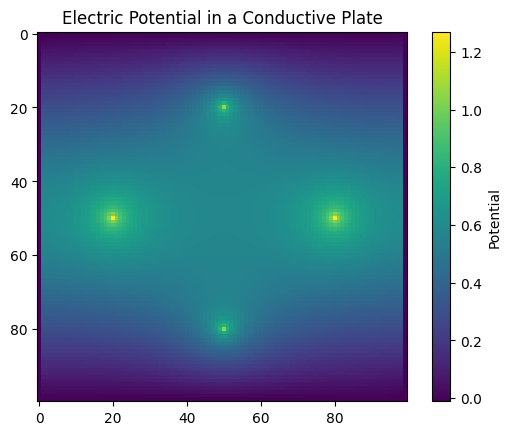

In [8]:
# Define the size of the plate
width = 100
height = 100

# Define the positions of the contacts
contacts = [(20, 50), (80, 50), (50, 20), (50, 80)]

# Initialize the potentials
potentials = np.zeros((height, width))

# Set the potential at the contacts
for x, y in contacts:
    potentials[y, x] = 1

# Define the indices of the interior points
interior = np.full((height, width), False)
interior[1:-1, 1:-1] = True

# Solve the Laplace equation
diagonals = [
    [-1] * ((width - 2) * (height - 2) - 1),
    [4] * ((width - 2) * (height - 2)),
    [-1] * ((width - 2) * (height - 2) - 1)
]
D = diags(diagonals, [-1, 0, 1])
A = np.eye((height - 2) * (width - 2)) * D

for y in range(1, height - 1):
    for x in range(1, width - 1):
        A[(y - 1) * (width - 2) + (x - 1), max(0, (y - 2) * (width - 2) + (x - 1))] = -1
        A[(y - 1) * (width - 2) + (x - 1), min((height - 2) * (width - 2) - 1, y * (width - 2) + (x - 1))] = -1

b = np.zeros((height - 2) * (width - 2))
b[np.ravel_multi_index(([c[0] - 1 for c in contacts], [c[1] - 1 for c in contacts]), ((height - 2), (width - 2)))] = 1

solution = spsolve(A, b)

# Reshape the solution into the shape of the plate
solution = solution.reshape((height - 2, width - 2))

# Insert the solution into the potentials
potentials[1:-1, 1:-1] = solution

# Plot the potentials
plt.imshow(potentials, cmap='viridis')
plt.colorbar(label='Potential')
plt.title('Electric Potential in a Conductive Plate')
plt.show()

In [6]:
# Generate some example data
# Usually, this data should be gathered from experiments
voltages = np.random.uniform(low=0, high=1, size=(100, 1))
currents = np.random.uniform(low=0, high=1, size=(100, 1))

# Split the data into training and testing sets
voltages_train, voltages_test, currents_train, currents_test = train_test_split(voltages, currents, test_size=0.2, random_state=0)

# Create and train the model
model = LinearRegression()
model.fit(voltages_train, currents_train)

# Estimate the contact resistance
resistance = 1 / model.coef_[0][0]
print(f'Estimated contact resistance: {resistance} ohms')

Estimated contact resistance: -23.910044088443822 ohms
